# Exemple Python

## Documentation de fonction

In [1]:
def bspline(p, j, x):
     """
    Return the value at x in [0,1[ of the B-spline with integer nodes of degree p with support starting at j.
    Implemented recursively using the [De Boor's Algorithm](https://en.wikipedia.org/wiki/De_Boor%27s_algorithm)

    .. math::
        B_{i,0}(x) := \left\{
        \begin{matrix}
        1 & \mathrm{if}  \quad t_i ≤ x < t_{i+1} \\
        0 & \mathrm{otherwise} 
        \end{matrix}
        \right.

    .. math::
            B_{i,p}(x) := \frac{x - t_i}{t_{i+p} - t_i} B_{i,p-1}(x) 
            + \frac{t_{i+p+1} - x}{t_{i+p+1} - t_{i+1}} B_{i+1,p-1}(x).

     """

     assert ((x >= 0.0) & (x <= 1.0))
     assert ((type(p) == int) & (type(j) == int))

     if p == 0:
         if j == 0:
             return 1.0
         else:
             return 0.0
     else:
         w = (x - j) / p
         w1 = (x - j - 1) / p
         return w * bspline(p - 1, j, x) + (1 - w1) * bspline(p - 1, j + 1, x)

In [5]:
# print(bspline.__doc__)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns


In [4]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (9,6)

In [11]:
n = 2000
seuil = 0.25
rng = np.random.RandomState(1234)
X1  = rng.rand(n)
X2  = rng.rand(n)
U   = rng.rand(n)
Y   = np.zeros(n, dtype=np.uint8)

In [12]:
Y[(X1 <= 0.25) & (U  <= seuil)] = 1
Y[(X1 >  0.25) & (X2 >= 0.75) & (U <= seuil)] = 1
Y[(X1 >  0.25) & (X2 <  0.75) & (U >  seuil)] = 1

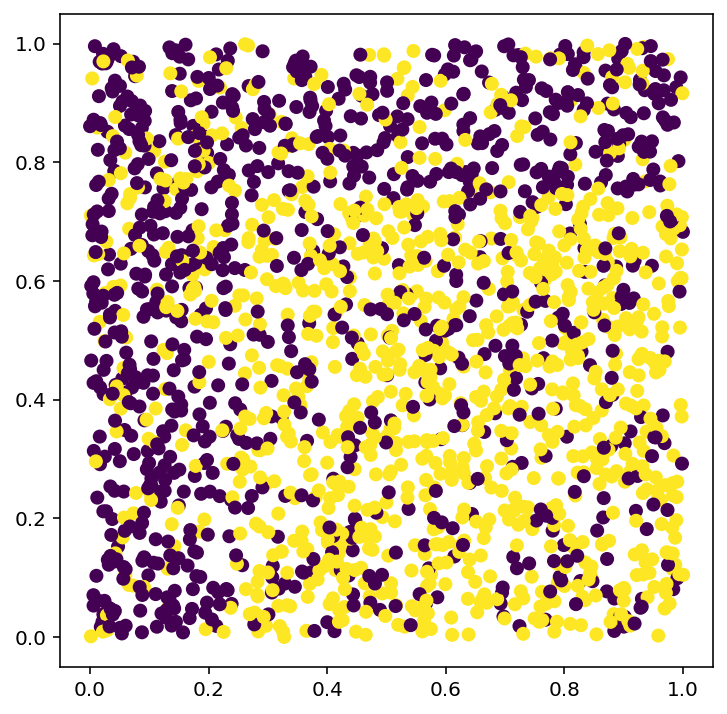

In [13]:
plt.axes().set_aspect("equal")
plt.scatter(X1, X2, c=Y)